In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.isnull().sum().max()

0

In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
print('Normal transactions:', f"{df['Class'].value_counts()[0]/len(df) * 100:.2f}", '% of the dataset')
print('Fraudulent transactions:', f"{df['Class'].value_counts()[1]/len(df) * 100:.2f}", '% of the dataset')

Normal transactions: 99.83 % of the dataset
Fraudulent transactions: 0.17 % of the dataset


Text(0.5, 1.0, 'Class Distribution \n (0: Normal transaction vs 1: Fraudulent transaction)')

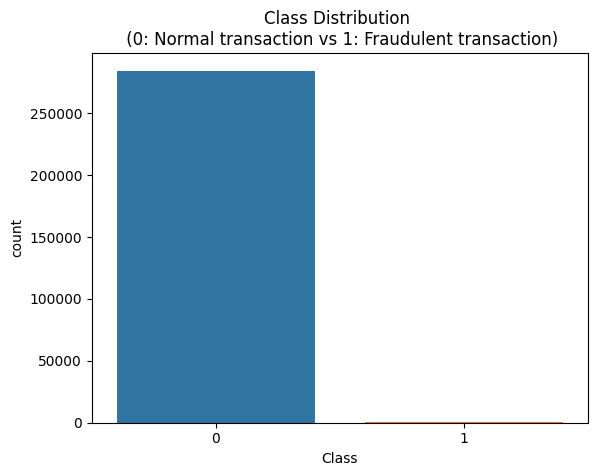

In [7]:
sns.countplot(df, x='Class')
plt.title('Class Distribution \n (0: Normal transaction vs 1: Fraudulent transaction)')

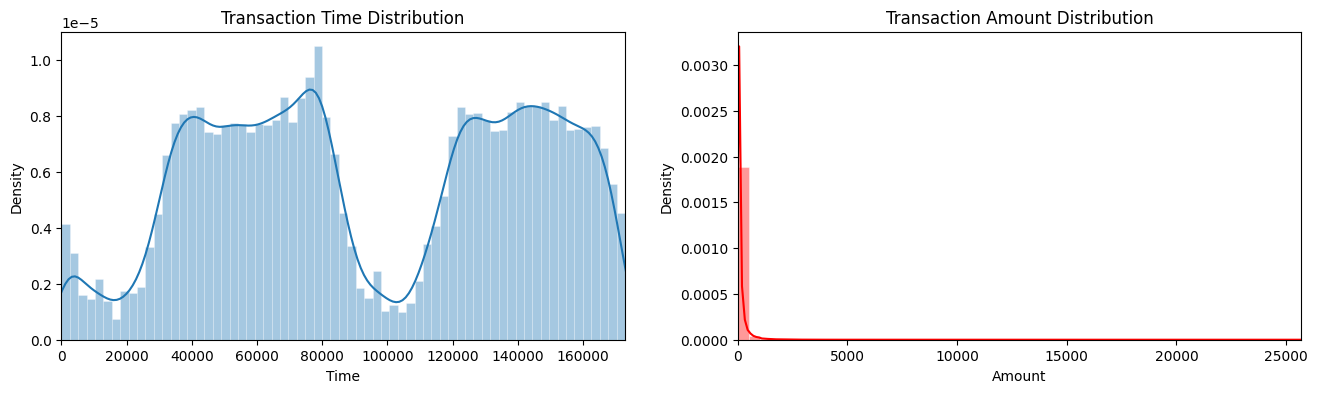

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(16,4))

sns.histplot(
    df['Time'], kde=True,
    stat="density", kde_kws=dict (cut=3), alpha=.4, edgecolor=(1, 1, 1, .4), ax=ax[0],
)

ax[0].set_title('Transaction Time Distribution')
ax[0].set_xlim([min (df ['Time']), max(df['Time'])])

sns.histplot(
df['Amount'], kde=True,
stat="density", kde_kws=dict (cut=3), alpha=.4, edgecolor=(1, 1, 1, .4),
ax=ax[1],
bins=50,
color='r'
)

ax[1].set_title('Transaction Amount Distribution') 
ax[1].set_xlim([min(df['Amount']), max(df['Amount'])])

plt.show()

In [14]:
scaler = RobustScaler()

if 'Time' in df:
    scaled_time = scaler.fit_transform(df['Time'].values.reshape(-1,1))
    scaled_amount = scaler.fit_transform(df['Amount'].values.reshape(-1,1))

    df.drop(['Time','Amount'], axis=1, inplace=True)
    df.insert(0, 'scaled time', scaled_time)
    df.insert(1, 'scaled_amount', scaled_amount)

df.head()

,scaled time,scaled_amount,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-0.994983,1.783274,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.994983,-0.269825,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,-0.994972,4.983721,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,-0.994972,1.418291,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,-0.994960,0.670579,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [16]:
x = df.drop('Class', axis=1)
y = df['Class']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [17]:
# Get a random sample of items from the dataset
df = df.sample(frac=1)

# 492 is used since it is the amount of fraud classes in the dataset
fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:492]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,scaled time,scaled_amount,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
238291,0.762626,-0.296514,1.947861,-0.565435,-0.383491,0.310970,-0.628532,0.151066,-0.897406,0.299563,...,-0.312669,0.222772,0.771088,0.180675,0.682568,-0.179946,-0.256801,0.027007,-0.044851,0
10897,-0.775409,-0.293440,-15.398845,7.472324,-19.026912,11.165526,-6.893856,-2.120937,-14.913330,-0.721214,...,1.111502,-2.444884,0.727495,-0.345078,-0.981749,0.995271,0.816762,2.262942,-1.178063,1
166305,0.391170,0.632991,1.933247,-0.110500,-1.935099,0.389500,0.314770,-0.787894,0.133048,-0.183616,...,-0.043324,-0.241528,-0.607252,0.146922,0.443632,-0.047102,-0.117379,-0.022554,-0.003557,0
47802,-0.485473,0.922239,-3.365319,2.426503,-3.752227,0.276017,-2.305870,-1.961578,-3.029283,-1.674462,...,-0.036837,2.070008,-0.512626,-0.248502,0.126550,0.104166,-1.055997,-1.200165,-1.012066,1
281674,1.006309,0.286872,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,...,-0.017652,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,1


Class Distribution in the subsample dataset
0    0.5
1    0.5
Name: Class, dtype: float64


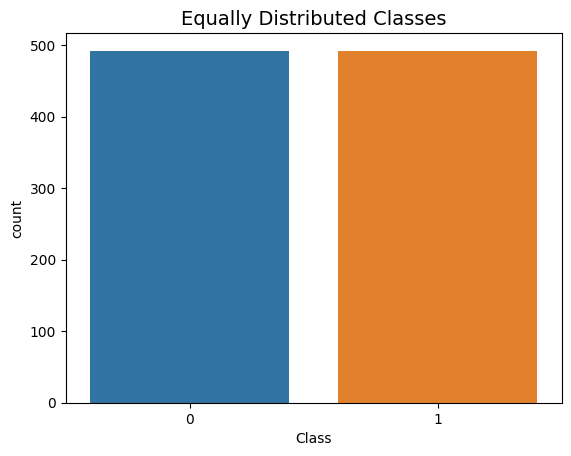

In [18]:
print('Class Distribution in the subsample dataset')
print(new_df['Class'].value_counts()/len(new_df))

sns.countplot(new_df, x='Class')
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

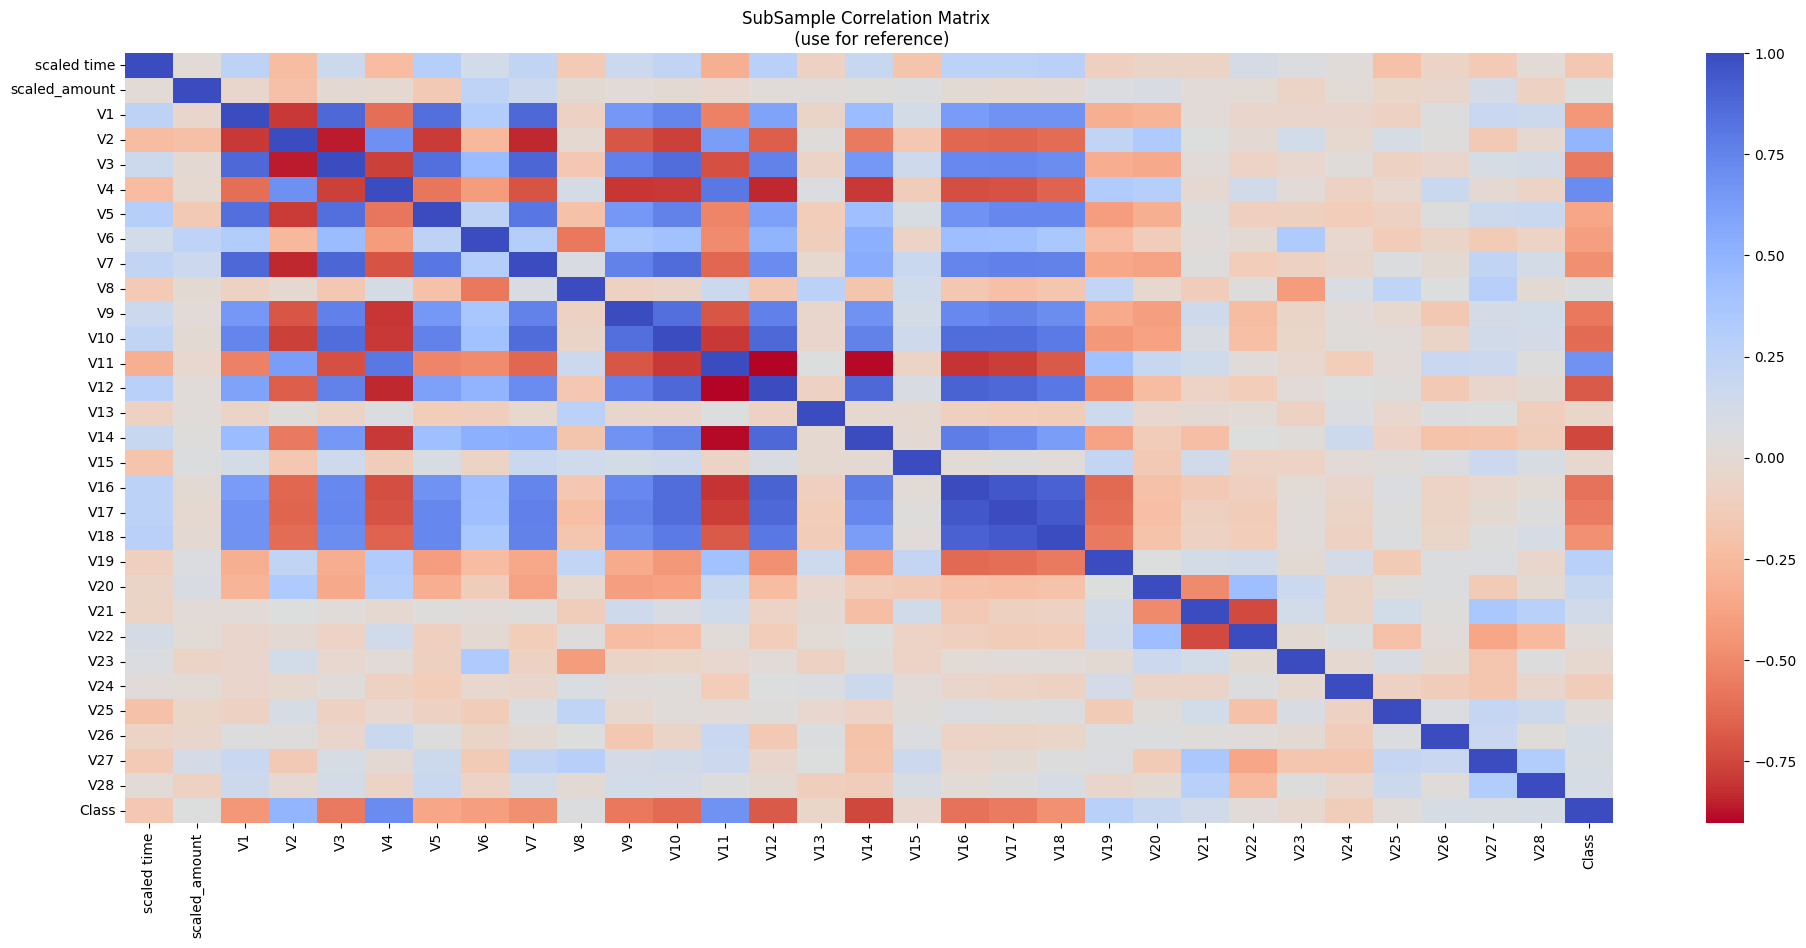

In [20]:
f, (ax) = plt.subplots(1, 1, figsize=(24,10))

sub_sample_corr = new_df.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax)
ax.set_title('SubSample Correlation Matrix \n (use for reference)')
plt.show()

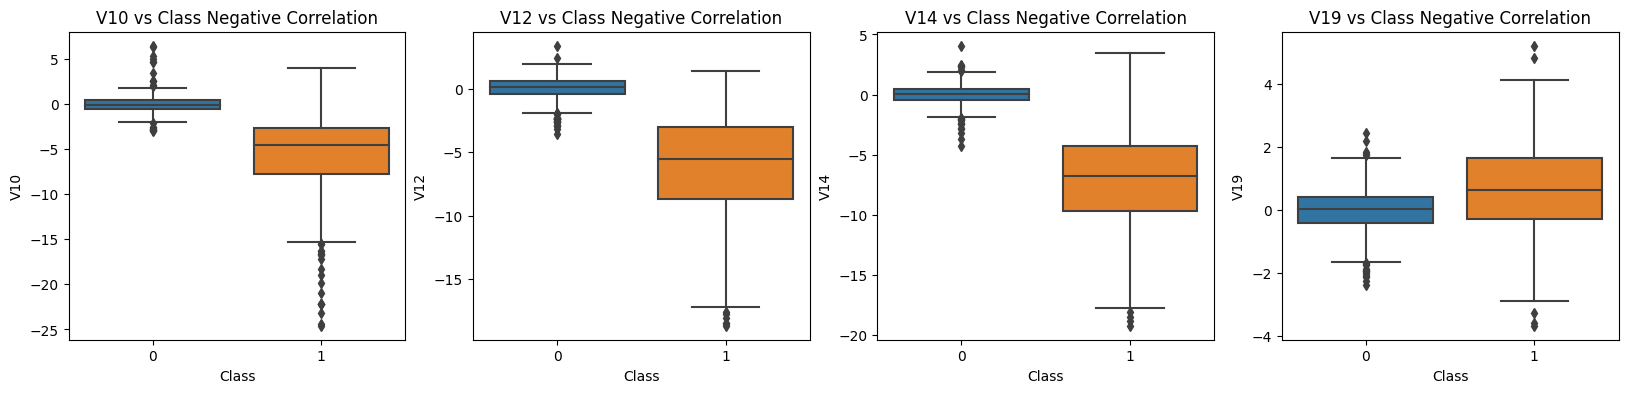

In [23]:
f, ax = plt.subplots(ncols=4, figsize=(20,4))

def boxplot_negative_corr(column, ax):
    sns.boxplot(x="Class", y=column, data=new_df, ax=ax)
    ax.set_title(f'{column} vs Class Negative Correlation')

# Negative Correlations with Class (The lower the feature value the more likely it will be a fraud transaction)
boxplot_negative_corr('V10', ax[0])
boxplot_negative_corr('V12', ax[1])
boxplot_negative_corr('V14', ax[2])
boxplot_negative_corr('V19', ax[3])

plt.show()

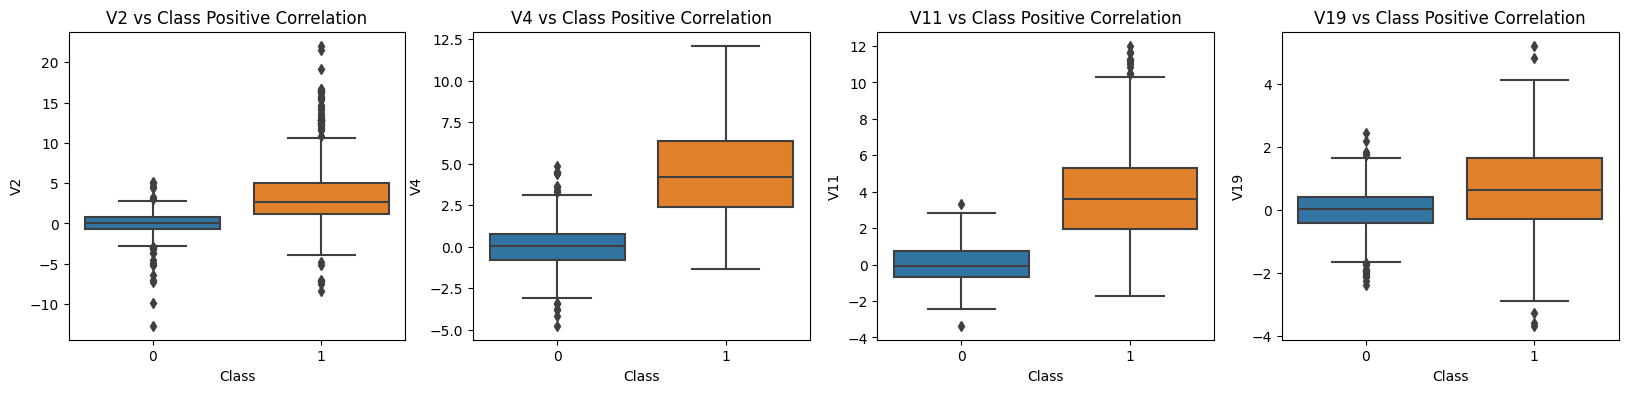

In [24]:
f, ax = plt.subplots(ncols=4, figsize=(20,4))

def boxplot_positive_corr(column, ax):
    sns.boxplot(x="Class", y=column, data=new_df, ax=ax)
    ax.set_title(f'{column} vs Class Positive Correlation')

# Positive correlations with Class (The higher the feature value the more likely it will be a fraud transaction)
boxplot_positive_corr('V2', ax[0])
boxplot_positive_corr('V4', ax[1])
boxplot_positive_corr('V11', ax[2])
boxplot_positive_corr('V19', ax[3])

plt.show()

In [34]:
from scipy.stats import norm

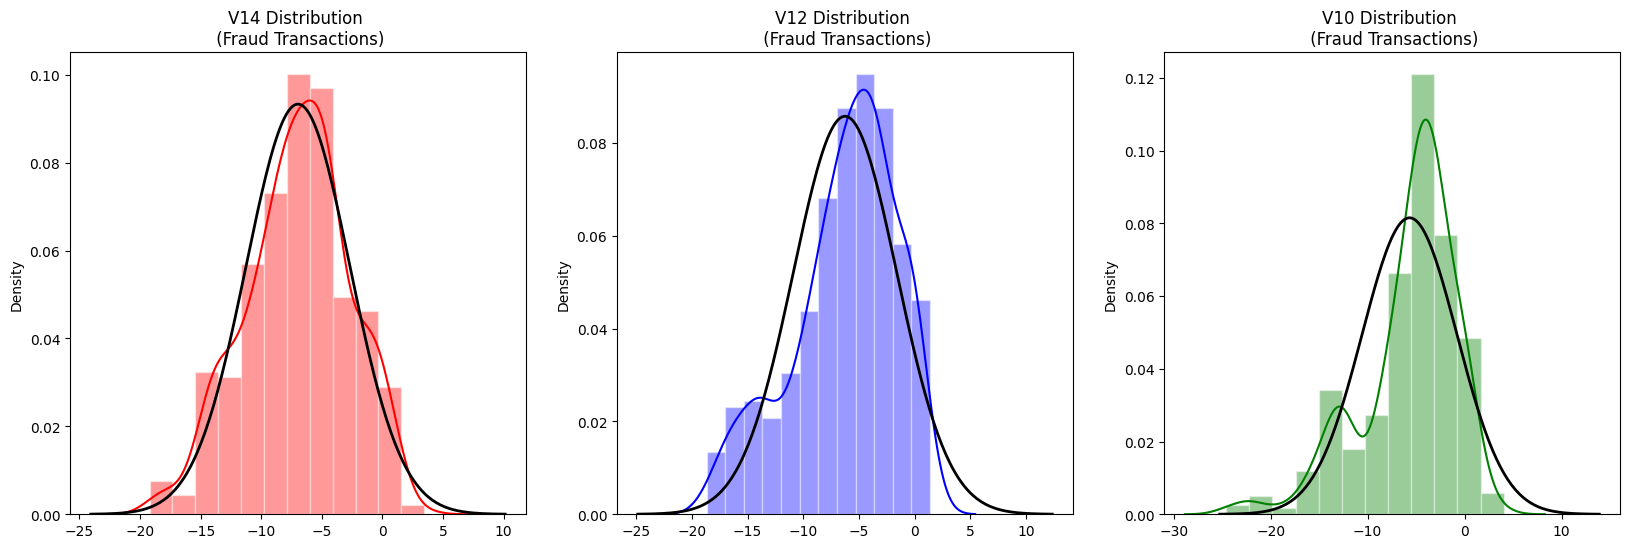

In [35]:
f, ax = plt.subplots(1,3, figsize=(20, 6))

def normal(mean, std, ax, color="black"):
    x = np.linspace(mean-4*std, mean+4*std, 200)
    p = norm.pdf(x, mean, std)
    z = ax.plot(x, p, color, linewidth=2)

def plot(column, ax, color):
    fraud_dist = new_df[column].loc[new_df['Class'] == 1].values
    sns.histplot(
        fraud_dist,
        kde=True,
        stat="density", kde_kws=dict(cut=3),
        alpha=.4, edgecolor=(1, 1, 1, .4),
        ax=ax,
        bins=12,
        color=color
    )
    ax.set_title(f'{column} Distribution \n (Fraud Transactions)')
    normal(fraud_dist.mean(), fraud_dist.std(), ax)

plot('V14', ax[0], 'r')
plot('V12', ax[1], 'b')
plot('V10', ax[2], 'g')

plt.show()

In [36]:
def remove_outliers(column):
    global new_df
    fraud = new_df[column].loc[new_df['Class'] == 1].values
    q25, q75 = np.percentile(fraud, 25), np.percentile(fraud, 75)
    print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
    iqr = q75 - q25
    print('IQR: {}'.format(iqr))
    
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off
    print('Cut Off: {}'.format(cut_off))
    print('{} Lower: {}'.format(column, lower))
    print('{} Upper: {}'.format(column, upper))
    
    outliers = [x for x in fraud if x < lower or x > upper]
    print('Feature {} Outliers for Fraud Cases: {}'.format(column, len(outliers)))
    print('{}'.format(outliers))
    
    new_df = new_df.drop(new_df[(new_df[column] > upper) | (new_df[column] < lower)].index)
    print('Number of Instances after outliers removal: {}'.format(len(new_df)))
    print('----' * 28)
    
# -----> V14 Removing Outliers (Highest Negative Correlated with Label)
remove_outliers('V14')

# -----> V12 removing outliers from fraud transactions
remove_outliers('V12')

# Removing outliers V10 Feature
remove_outliers('V10')

Quartile 25: -9.692722964972386 | Quartile 75: -4.282820849486865
IQR: 5.409902115485521
Cut Off: 8.114853173228282
V14 Lower: -17.807576138200666
V14 Upper: 3.8320323237414167
Feature V14 Outliers for Fraud Cases: 4
[-19.2143254902614, -18.0499976898594, -18.8220867423816, -18.4937733551053]
Number of Instances after outliers removal: 979
----------------------------------------------------------------------------------------------------------------
Quartile 25: -8.67303320439115 | Quartile 75: -2.893030568676315
IQR: 5.780002635714835
Cut Off: 8.670003953572252
V12 Lower: -17.3430371579634
V12 Upper: 5.776973384895937
Feature V12 Outliers for Fraud Cases: 4
[-18.6837146333443, -18.5536970096458, -18.0475965708216, -18.4311310279993]
Number of Instances after outliers removal: 975
----------------------------------------------------------------------------------------------------------------
Quartile 25: -7.466658535821847 | Quartile 75: -2.5118611381562523
IQR: 4.954797397665595
Cut 

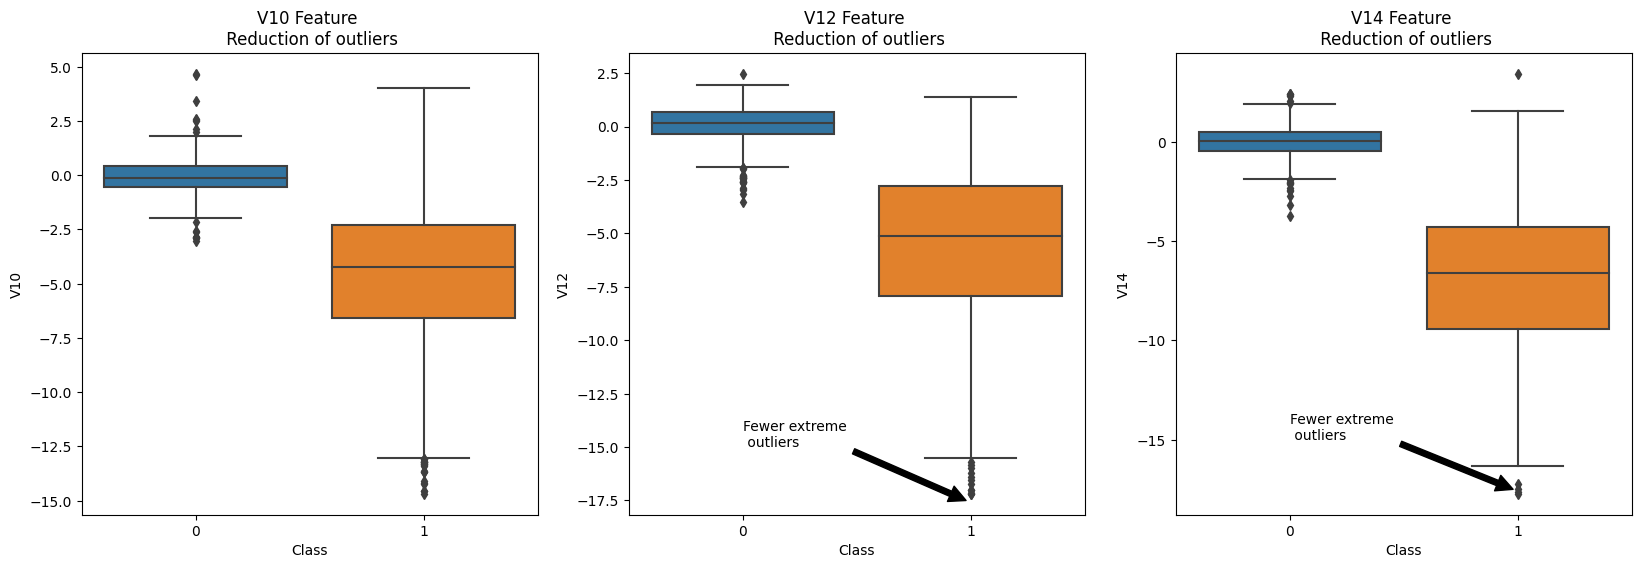

In [37]:
f, ax = plt.subplots(1, 3, figsize=(20,6))

def boxplot_without_outliers(column, ax):
    sns.boxplot(x="Class", y=column, data=new_df, ax=ax)
    ax.set_title(f"{column} Feature \n Reduction of outliers")
    ax.annotate('Fewer extreme \n outliers', xy=(0.98, -17.5), xytext=(0, -15),
                arrowprops=dict(facecolor='black'))

# Boxplots with outliers removed
# Feature V10
boxplot_without_outliers('V10', ax[0])
# Feature V12
boxplot_without_outliers('V12', ax[1])
# Feature V14
boxplot_without_outliers('V14', ax[2])

plt.show()

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict

In [43]:
# Undersampling before cross validating (prone to overfit)
x = new_df.drop('Class', axis=1)
y = new_df['Class']

# This is explicitly used for undersampling.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Turn the values into an array for feeding the classification algorithms.
x_train = x_train.values
x_test = x_test.values
y_train = y_train.values
y_test = y_test.values

# Let's implement these classifiers
classifiers = {
    "LogisticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Random Forest Classifier": RandomForestClassifier(),
    "DecisionTreeClassifier": DecisionTreeClassifier()
}

In [47]:
for key, classifier in classifiers.items():
    classifier.fit(x_train, y_train)
    training_score = cross_val_score(classifier, x_train, y_train, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Training score -", 
          f"{training_score.mean() * 100:.2f}", "% accuracy")

Classifiers:  LogisticRegression Training score - 94.30 % accuracy
Classifiers:  KNeighborsClassifier Training score - 94.57 % accuracy
Classifiers:  RandomForestClassifier Training score - 94.44 % accuracy
Classifiers:  DecisionTreeClassifier Training score - 91.13 % accuracy


In [58]:
# Use GridSearchCV to find the determine parameters which give best predictive scores.
log_reg_params = {'penalty': ['l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
knears_params = {"n_neighbors": list(range(2,5)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
rf_params = { 'n_estimators': [200, 500], 'max_depth' : [4,5,6,7,8], 'criterion' : ['gini', 'entropy']}
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)),
               "min_samples_leaf": list(range(5,7,1))}

def get_pred(classifier, params, decision = False):
    grid = GridSearchCV(classifier, params)
    grid.fit(x_train, y_train)
    # We automatically get the best parameters using the estimator
    estimator = grid.best_estimator_
    pred = cross_val_predict(estimator, x_train, y_train, cv=5, method="decision_function") if decision else cross_val_predict(estimator, x_train, y_train, cv=5)
    return estimator, pred

log_reg, log_reg_pred = get_pred(LogisticRegression(solver='lbfgs', max_iter=1000), log_reg_params, True)
knears, knears_pred = get_pred(KNeighborsClassifier(), knears_params)
rf, rf_pred = get_pred(RandomForestClassifier(), rf_params)
tree, tree_pred = get_pred(DecisionTreeClassifier(), tree_params, False)

# Overfitting Case

log_reg_score = cross_val_score(log_reg, x_train, y_train, cv=5)
print('Logistic Regression Cross Validation Score: ', round(log_reg_score.mean() * 100, 2).astype(str) + '%')

knears_score = cross_val_score(knears, x_train, y_train, cv=5)
print('Kneears Neighbors Cross Validation Score', round(knears_score.mean() * 100, 2).astype(str) + '%')

rf_score = cross_val_score(rf, x_train, y_train, cv=5)
print('Random Forest Classifier Cross Validation Score', round(rf_score.mean() * 100, 2).astype(str) + '%')

tree_score = cross_val_score(tree, x_train, y_train, cv=5)
print('DecisionTree Classifier Cross Validation Score', round(tree_score.mean() * 100, 2).astype(str) + '%')

Logistic Regression Cross Validation Score:  95.23%
Kneears Neighbors Cross Validation Score 94.3%
Random Forest Classifier Cross Validation Score 94.44%
DecisionTree Classifier Cross Validation Score 92.58%


In [66]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score 
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [61]:
# Comparing roc_auc_score of the classifiers
classifier_pred_map = {
    "LogisticRegression": log_reg_pred,
    "KNeighborsClassifier": knears_pred,
    "RandomForestClassifier": rf_pred,
    "DecisionTreeClassifier": tree_pred
}

for key, classifier in classifiers.items():
    pred = classifier_pred_map[classifier.__class__.__name__]
    print(classifier.__class__.__name__, 'ROC AUC score:', f"{roc_auc_score(y_train, pred) * 100:.2f}%")

LogisticRegression ROC AUC score: 98.38%
KNeighborsClassifier ROC AUC score: 94.12%
RandomForestClassifier ROC AUC score: 94.08%
DecisionTreeClassifier ROC AUC score: 92.08%


In [67]:
# Comparing accuracy_score, precision_score, recall_score, f1_score and roc_auc_score of the classifiers
classifier_pred_map = {
    "LogisticRegression": log_reg_pred,
    "KNeighborsClassifier": knears_pred,
    "RandomForestClassifier": rf_pred,
    "DecisionTreeClassifier": tree_pred
}

def get_pred(c):
    c.fit(x_train, y_train)
    return c.predict(x_test)

for key, classifier in classifiers.items():
    pred = get_pred(classifier)
    for score in [accuracy_score, precision_score, recall_score, f1_score, roc_auc_score]:
        print(classifier.__class__.__name__, f'{score.__name__}:', f"{score(y_test, pred) * 100:.2f}%")
    print('-' * 28)

LogisticRegression accuracy_score: 92.59%
LogisticRegression precision_score: 97.75%
LogisticRegression recall_score: 87.88%
LogisticRegression f1_score: 92.55%
LogisticRegression roc_auc_score: 92.83%
----------------------------
KNeighborsClassifier accuracy_score: 92.06%
KNeighborsClassifier precision_score: 100.00%
KNeighborsClassifier recall_score: 84.85%
KNeighborsClassifier f1_score: 91.80%
KNeighborsClassifier roc_auc_score: 92.42%
----------------------------
RandomForestClassifier accuracy_score: 92.06%
RandomForestClassifier precision_score: 97.73%
RandomForestClassifier recall_score: 86.87%
RandomForestClassifier f1_score: 91.98%
RandomForestClassifier roc_auc_score: 92.32%
----------------------------
DecisionTreeClassifier accuracy_score: 87.83%
DecisionTreeClassifier precision_score: 90.43%
DecisionTreeClassifier recall_score: 85.86%
DecisionTreeClassifier f1_score: 88.08%
DecisionTreeClassifier roc_auc_score: 87.93%
----------------------------


In [68]:
final_df = pd.DataFrame({
    "model": ["Log Regression", "K-Neighbors", "Random Forest", "Decision Tree"]
    ,"accuracy": [
        accuracy_score(y_test, get_pred(LogisticRegression()))*100,
        accuracy_score(y_test, get_pred(KNeighborsClassifier()))*100,
        accuracy_score(y_test, get_pred(RandomForestClassifier()))*100,
        accuracy_score(y_test, get_pred(DecisionTreeClassifier()))*100
    ]
})
final_df

,model,accuracy
0,Log Regression,92.592593
1,K-Neighbors,92.063492
2,Random Forest,92.592593
3,Decision Tree,87.830688


<AxesSubplot:xlabel='model', ylabel='accuracy'>

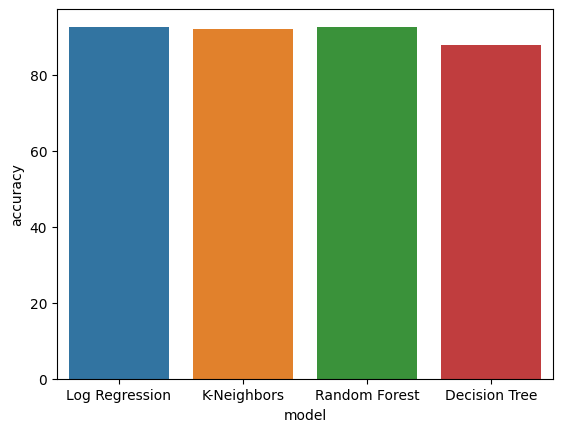

In [69]:
sns.barplot(x="model", y="accuracy", data=final_df)